<a href="https://colab.research.google.com/github/OrYSlliu/Labs/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_train = pd.read_excel('/content/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls', sheet_name=['Training_Data'])
df_train = pd.concat(df_train).reset_index().drop(['level_0','level_1','Unnamed: 6',	'Unnamed: 7',	'Attribute Information:'], axis = 1)
df_train

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [12]:
df_test = pd.read_excel('/content/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls', sheet_name=['Test_Data'])
df_test = pd.concat(df_test).reset_index().drop(['level_0','level_1','Unnamed: 6',	'Unnamed: 7',	'Attribute Information:'], axis = 1)
df_test

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High
141,0.85,0.82,0.66,0.83,0.83,High
142,0.56,0.60,0.77,0.13,0.32,Low
143,0.66,0.68,0.81,0.57,0.57,Middle


In [13]:
df = pd.concat([df_test, df_train])
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


* STG (Степень времени изучения материалов объекта цели),
* SCG (Степень количества повторений пользователя для материалов объекта цели)
* STR (Степень учебного времени пользователя для связанных объектов с целевым объектом)
* LPR (Экзаменационная успеваемость пользователя по связанным объектам с целевым объектом)
* PEG (Экзаменационная успеваемость пользователя по целевым предметам)
* UNS (Уровень знаний пользователя)





### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [14]:
pd.unique(df[' UNS'])

array(['Very Low', 'Low', 'High', 'Middle', 'very_low'], dtype=object)

In [15]:
df[' UNS'] = df[' UNS'].replace(['Very Low', 'very_low'], 'Very Low')

In [16]:
pd.unique(df[' UNS'])

array(['Very Low', 'Low', 'High', 'Middle'], dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5    UNS    403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 22.0+ KB


In [18]:
df = df.rename(columns={' UNS': 'UNS'})

In [19]:
#from sklearn.preprocessing import LabelEncoder

#label = LabelEncoder()

#df_label = label.fit_transform(df['UNS'])

#df_label = pd.DataFrame(df_label, columns=['UNS'])

#df_reg = df.drop(['UNS', 'PEG'], axis = 1)
#df_reg['UNS_label'] = df_label
#df_reg['UNS_label'] = df_reg['UNS_label'].astype('category')
#df_reg

from sklearn.preprocessing import OneHotEncoder

df['UNS'] = df['UNS'].astype("category")
category_cols = df.select_dtypes(include=['category']).columns

one = OneHotEncoder(handle_unknown='ignore')

df_encoded = pd.get_dummies(df, columns=category_cols)
encoded_features = one.fit_transform(df[category_cols])
encoded_columns = one.get_feature_names_out(category_cols)

encoded_columns

array(['UNS_High', 'UNS_Low', 'UNS_Middle', 'UNS_Very Low'], dtype=object)

In [20]:
df_encoded

,STG,SCG,STR,LPR,PEG,UNS_High,UNS_Low,UNS_Middle,UNS_Very Low
0,0.00,0.10,0.50,0.26,0.05,0,0,0,1
1,0.05,0.05,0.55,0.60,0.14,0,1,0,0
2,0.08,0.18,0.63,0.60,0.85,1,0,0,0
3,0.20,0.20,0.68,0.67,0.85,1,0,0,0
4,0.22,0.22,0.90,0.30,0.90,1,0,0,0
...,...,...,...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1,0,0,0
254,0.78,0.61,0.71,0.19,0.60,0,0,1,0
255,0.54,0.82,0.71,0.29,0.77,1,0,0,0
256,0.50,0.75,0.81,0.61,0.26,0,0,1,0


In [21]:
df_reg = df_encoded.drop(['PEG'], axis = 1)

In [22]:
num_columns = num_columns = df.select_dtypes(include=['float64']).columns # выбираем числвоые колонки

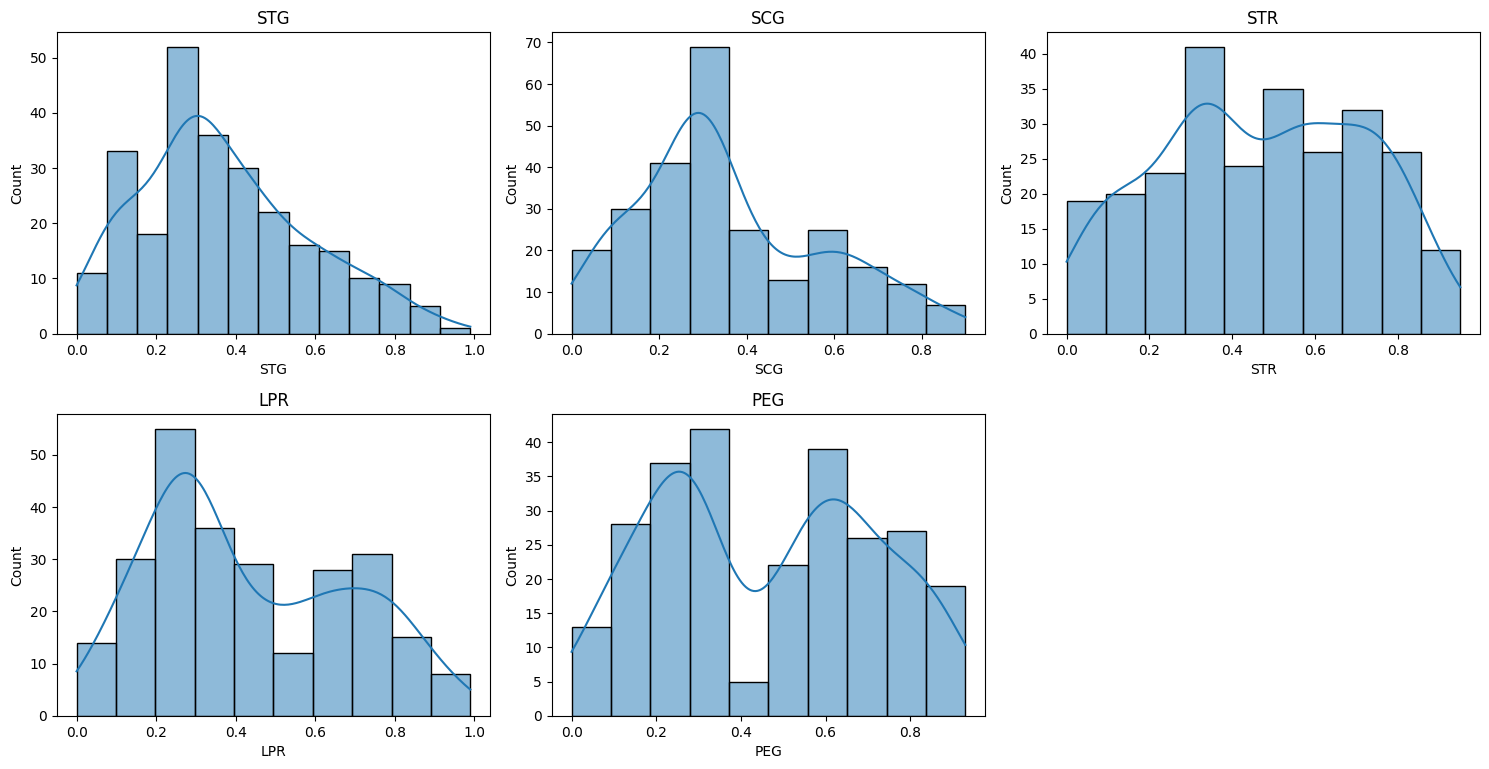

In [23]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_train[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<ipython-input-24-c9872dbd6b35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


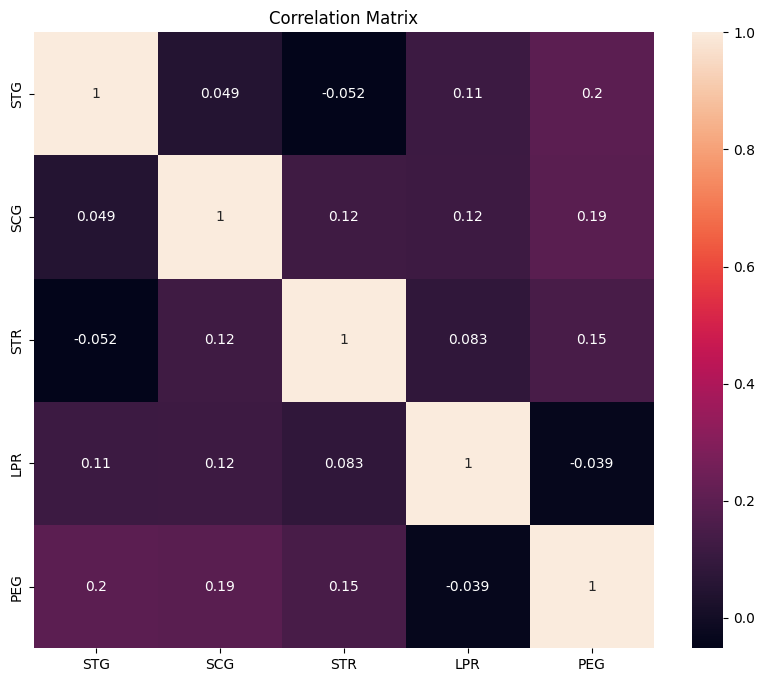

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='PEG', ylabel='UNS'>

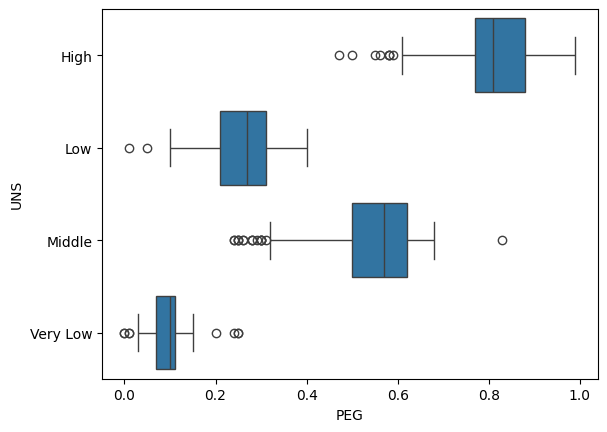

In [25]:
sns.boxplot(data=df, x='PEG', y='UNS')

Будем предсказывать экзаменацеонную успеваймость PEG.

Как видно из кореляционной матрицы все параметры влияют на целевую переменную

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [26]:
df_reg.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'UNS_High', 'UNS_Low', 'UNS_Middle',
       'UNS_Very Low'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Выборка признаков и целевой переменной
X = df_reg[['STG', 'SCG']]
y = df['PEG']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [28]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)


{'MAE': 0.22426230913732348,
 'MSE': 0.06559327547818486,
 'R2': 0.04502202037026526,
 'mape (reverted - % верно угаданых)': -572518356890664.8,
 'mape (original - % ошибок)': 572518356890764.8}

In [29]:
model = compute_regression(X, y) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X)

compute_metrics(y, y_pred)


{'MAE': 0.2221560136424289,
 'MSE': 0.06578680219990715,
 'R2': 0.07332780011821805,
 'mape (reverted - % верно угаданых)': -758344454440962.2,
 'mape (original - % ошибок)': 758344454441062.2}

<Axes: xlabel='PEG', ylabel='Count'>

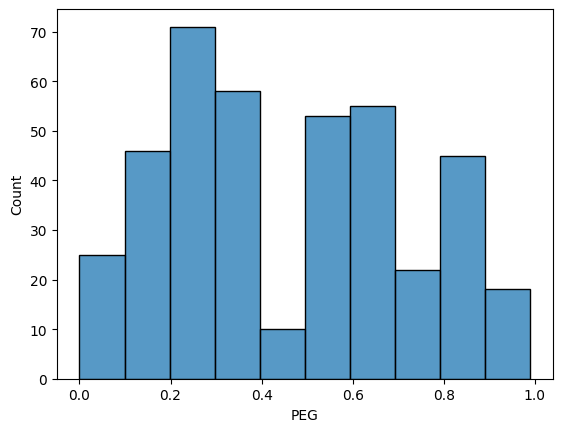

In [30]:
sns.histplot(data = df, x = 'PEG')


In [31]:
from sklearn.neighbors import KNeighborsRegressor


def compute_Knn(X, y):
  # Создание и обучение модели линейной регрессии
  neigh = KNeighborsRegressor(n_neighbors=2)
  neigh.fit(X, y)

  return neigh


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

In [32]:
neigh = compute_Knn(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = neigh.predict(X_train)

compute_metrics(y_train, y_pred)


{'MAE': 0.11602018633540373,
 'MSE': 0.023166744565217393,
 'R2': 0.6627134297196762,
 'mape (reverted - % верно угаданых)': -174829178081116.38,
 'mape (original - % ошибок)': 174829178081216.38}

In [33]:
neigh = compute_Knn(X, y) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = neigh.predict(X)

compute_metrics(y, y_pred)

{'MAE': 0.11060421836228289,
 'MSE': 0.02177907382133995,
 'R2': 0.6932201965360569,
 'mape (reverted - % верно угаданых)': -614635184876822.1,
 'mape (original - % ошибок)': 614635184876922.1}

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [34]:
"""
Результат работы

"""

class LinearRegression():

    # Initiating the parameters.
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):

        self.m = len(y)
        self.X = np.c_[np.ones(self.m), X]  # добавляем колонку для intercept
        self.theta = np.zeros(X.shape[1])
        self.prev_theta = np.zeros(X.shape[1])
        self.unchanged_count = 0

        for iteration in range(self.max_iter):
            self.gradients = -2/self.m * X.T.dot(y - X.dot(self.theta))
            self.prev_theta = self.theta.copy()
            self.theta -= self.learning_rate * self.gradients

            # Проверка на изменение коэффициентов
            # Упрощенный пример реализации
            # нейросетевого early_stopping https://keras.io/api/callbacks/early_stopping/
            if np.allclose(self.prev_theta, self.theta):
                self.unchanged_count += 1
            else:
                self.unchanged_count = 0

            if self.unchanged_count >= 5:
                break
        return self

    def predict(self, X):
        return X.dot(self.theta)

In [35]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_train)
compute_metrics(y_train, y_predict)

{'MAE': 0.22971441824772457,
 'MSE': 0.08155211008118586,
 'R2': -0.18732398637074077,
 'mape (reverted - % верно угаданых)': -343981237920742.5,
 'mape (original - % ошибок)': 343981237920842.5}

In [36]:
from sklearn.metrics.pairwise import euclidean_distances

class Knn():
    def __init__(self,k=5):
        self.k = k
    def fit(self,X,y):
        self.x_test = X
        self.y = y.to_numpy()
        return self
    def predict(self,X):
        self.distances = euclidean_distances(self.x_test,X)
        self.y_pred = np.zeros(len(X))

        for i in range(0, len(X)):
            self.test_point = X.iloc[i].to_numpy()
            self.neighbours = np.argsort(self.distances[i])[:self.k]
            self.y_pred[i] = np.mean(self.y[self.neighbours])
        return self.y_pred

In [37]:
model_knn = Knn()
model_knn = model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_train)
compute_metrics(y_train, y_pred_knn)

{'MAE': 0.16386832298136647,
 'MSE': 0.03889199751552795,
 'R2': 0.43376815778172295,
 'mape (reverted - % верно угаданых)': -472738097531426.25,
 'mape (original - % ошибок)': 472738097531526.25}

In [38]:
pd.DataFrame({'y_pred': y_pred_knn, 'y_test': y_train})

,y_pred,y_test
208,0.212,0.11
88,0.588,0.18
3,0.730,0.85
18,0.324,0.32
131,0.360,0.30
...,...,...
71,0.338,0.08
106,0.514,0.68
125,0.652,0.50
203,0.348,0.29
